In [0]:
#!pip install datadotworld
#!pip install datadotworld[pandas]

In [0]:
#!dw configure

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np

import datadotworld as dw

In [0]:
#drive.mount('/content/drive')

In [7]:
cd "drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [11]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [0]:
!echo 'data' > .gitignore

In [0]:
!git add .gitignore

In [0]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')

In [19]:
df = data.dataframes['7004_1']

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


In [20]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
13542,AVpe6tnJLJeJML43yQiQ,NaN,Unbranded,"Clothing, Shoes & Accessories,Men's Accessorie...","Brown Green,Coffee,Khaki Yellow",NaN,2016-03-24T02:33:43Z,2016-04-25T03:01:44Z,NaN,NaN,7.101859e+11,"[{""key"":""Style"",""value"":[""Messenger/Shoulder B...",NaN,http://i.ebayimg.com/images/g/q6MAAOSwNyFWget8...,NaN,"710185860107,0710185860107,mencanvasleathersat...",NaN,NaN,"[{""dateSeen"":[""2016-03-22T00:00:00Z""],""name"":""...","""Men Canvas Leather Satchel Military 15"" Lapto...",74.95,74.95,NaN,NaN,New with tags,NaN,USD,2016-04-01T19:11:35Z,2016-04-24T00:00:00Z,NaN,false,hc_huachen - Ebay.com,NaN,NaN,FREE,NaN,NaN,http://www.ebay.com/itm/Men-Canvas-Leather-Sat...,NaN,NaN,NaN,15,"[{""sourceURLs"":[""http://www.ebay.com/itm/Men-C...",http://www.ebay.com/itm/Men-Canvas-Leather-Sat...,710185860107,NaN,NaN,NaN
18386,AVpf3erVLJeJML43FJ-E,B00127WY40,Norcross Safety Products,"Health,Clothing, Shoes & Jewelry,Men,Uniforms,...",NaN,NaN,2014-12-02T11:21:10Z,2016-02-10T23:15:08Z,NaN,NaN,8.166873e+11,NaN,NaN,http://ecx.images-amazon.com/images/I/41pS32oA...,NaN,norcrossservusprokneebootssize117510111/b00127...,NaN,NaN,NaN,Norcross Servus Pro Knee Boots - Size 11 - 751...,70.81,70.81,NaN,NaN,NaN,NaN,USD,2014-12-02T11:21:10Z,2014-12-02T06:45:35.115Z,NaN,false,NaN,NaN,NaN,FREE Shipping,NaN,NaN,http://www.amazon.com/Norcross-Servus-PRO-Knee...,NaN,NaN,NaN,NaN,NaN,http://www.amazon.com/Norcross-Servus-PRO-Knee...,816687299015,NaN,NaN,4.6 pounds
8580,AVpfMe2vilAPnD_xW9mG,NaN,New Balance,"All Men's Shoes,Shoes,Men's Shoes,Clothing",BlueOrange,NaN,2016-11-15T13:19:50Z,2016-11-15T13:19:50Z,"[{""dateSeen"":[""2016-11-15T13:19:50Z""],""sourceU...",NaN,8.899696e+11,"[{""key"":""Shoe Size"",""value"":[""7""]},{""key"":""Gen...",NaN,https://i5.walmartimages.com/asr/8663f396-6e03...,NaN,"889969607037,0889969607037",NaN,NaN,"[{""dateSeen"":[""2016-11-15T13:19:50Z""],""name"":""...","New Balance Kids Running Shoe, Blue/orange, 7 M",56.99,56.99,NaN,NaN,new,NaN,USD,2016-11-15T13:19:50Z,2016-11-11T00:00:00Z,NaN,false,ULTIMATE SHOE ZONE - Walmart.com,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/New-Balance-Kids-Ru...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/New-Balance-Kids-Ru...,889969607037,NaN,NaN,NaN
4626,AVpfIi4RilAPnD_xVqOa,NaN,Wrangler,"Clothing, Shoes & Jewelry,Clothing,Men's Cloth...","Light Blue,Medium Blue,Classic Blue",NaN,2016-03-22T23:36:27Z,2016-03-29T04:32:58Z,NaN,NaN,NaN,"[{""key"":""Style"",""value"":[""Regular fit""]},{""key...",NaN,NaN,NaN,wranglermensadvancedcomfortpremiumdenimregular...,NaN,WRO25DI,NaN,Wrangler Men's Advanced Comfort Premium Denim ...,29.99,29.99,NaN,NaN,NaN,NaN,USD,2016-03-22T23:36:27Z,2016-03-23T00:00:00Z,NaN,true,Sears.com,NaN,NaN,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,"30,32,34,36,38,40,42","[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/config/produc...,NaN,NaN,NaN,NaN
10517,AVpfThaZ1cnluZ0-iOY7,NaN,Vesuvio Napoli,"Bags & Accessories,Men's Accessories,Clothing,...",NaN,NaN,2016-02-16T02:09:43Z,2016-04-01T04:32:59Z,NaN,2 in x 3 in x 1 in,NaN,"[{""key"":""Style"",""value"":[""Suspenders""]},{""key""...",NaN,http://c.shld.net/rpx/i/s/pi/mp/10158793/prod_...,NaN,"vesuvionapoli/vs10100532,vesuvionapolinewmenss...",NaN,VS10100532,NaN,Vesuvio Napoli New Men's Suspender Elastic Bra...,17.95,17.95,NaN,NaN,NaN,NaN,USD,2016-02-16T02:09:43Z,2016-03-30T00:00:00Z,NaN,false,Mezza,NaN,NaN,NaN,NaN,NaN,http://www.sears.com/co

In [21]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [22]:
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [24]:
df.prices_currency.value_counts(normalize=True)

USD                                                   0.959246
AUD                                                   0.017503
CAD                                                   0.015691
EUR                                                   0.005541
GBP                                                   0.001139
UnbeatableSale.com, Inc. - Walmart.com                0.000155
PalmBeach Jewelry - Walmart.com                       0.000155
New with box                                          0.000155
new                                                   0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000104
Shoes.com                                             0.000052
SHOEBACCA LTD. - Walmart.com                          0.000052
New without tags                                      0.000052
Name: prices_currency, dtype: float64

In [0]:
df_usd = df[df.prices_currency == 'USD'].copy()

In [28]:
df_usd.shape

(18524, 48)

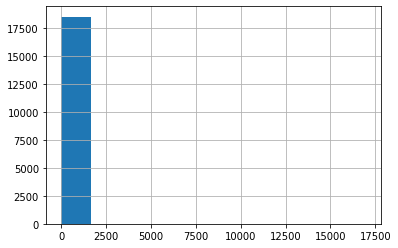

In [30]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)
df_usd['prices_amountmin'].hist()

Usuwanie wartości odstających od zbioru, percentile - w 99% przypadków kwota jest równa lub mniejsza od wyliczonej

In [0]:
percentile_99_for_prices_amountmin_filter = np.percentile(df_usd['prices_amountmin'], 99)

In [0]:
df_usd_filter = df_usd[ df_usd.prices_amountmin <=  percentile_99_for_prices_amountmin_filter ]

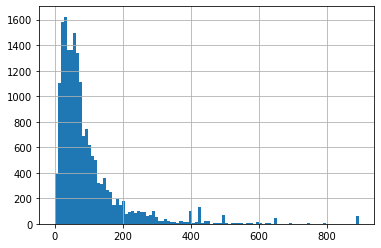

In [36]:
df_usd_filter.prices_amountmin.hist(bins=100)

In [0]:
!git add matrix_one/Day3.ipynb
!git commit -m "Read Men's Shoe Prices dataset from data.world"